In [124]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
from pandas.core.internals.construction import dataclasses_to_dicts
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv')

In [126]:
data

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,"Economic Sciences, Business Studies, Commerce ...",Yes,19,Male,Yes,Yes,3,4,3,3,4,3,4,Yes,Work Ethic,Not willing to start a venture in India and wa...,0
2083,Engineering Sciences,Yes,19,Female,Yes,No,4,5,4,4,5,5,3,Yes,Positivity,NaN,1
2084,Engineering Sciences,No,19,Male,Yes,Yes,3,5,4,5,5,5,3,No,Positivity,Academic Pressure,0
2085,Engineering Sciences,No,20,Male,Yes,Yes,5,5,5,5,5,5,5,No,Positivity,Just not interested! (Want to work in the corp...,0


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         2087 non-null   object
 1   IndividualProject       2087 non-null   object
 2   Age                     2087 non-null   int64 
 3   Gender                  2087 non-null   object
 4   City                    2087 non-null   object
 5   Influenced              2087 non-null   object
 6   Perseverance            2087 non-null   int64 
 7   DesireToTakeInitiative  2087 non-null   int64 
 8   Competitiveness         2087 non-null   int64 
 9   SelfReliance            2087 non-null   int64 
 10  StrongNeedToAchieve     2087 non-null   int64 
 11  SelfConfidence          2087 non-null   int64 
 12  GoodPhysicalHealth      2087 non-null   int64 
 13  MentalDisorder          2087 non-null   object
 14  KeyTraits               2087 non-null   object
 15  Reas

# EXPLORATORY DATA ANALYSIS


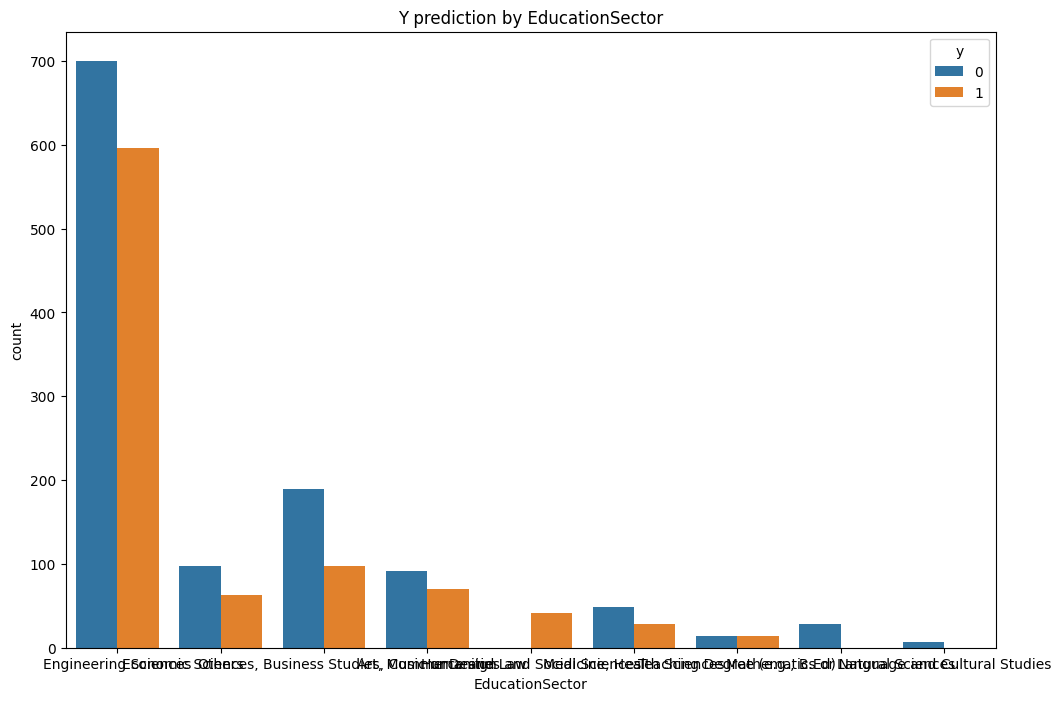

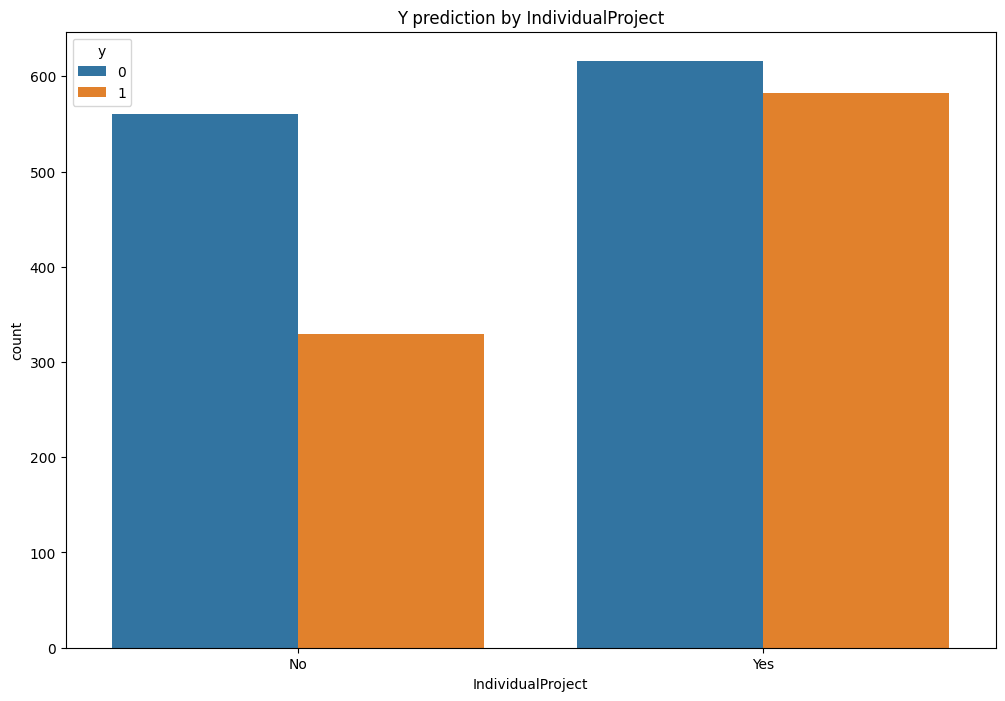

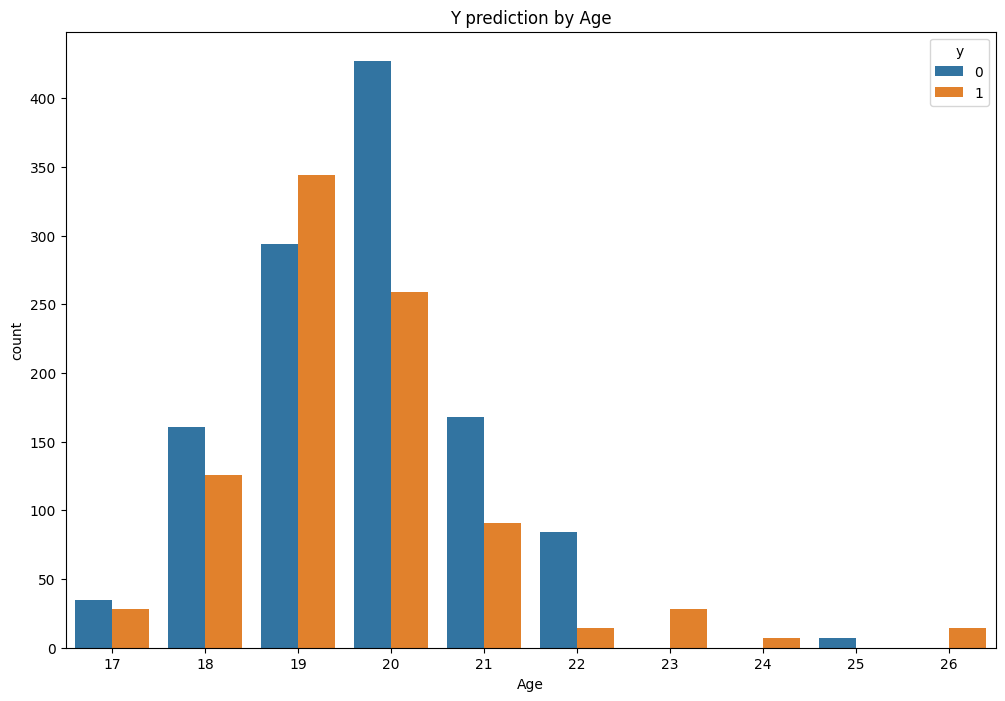

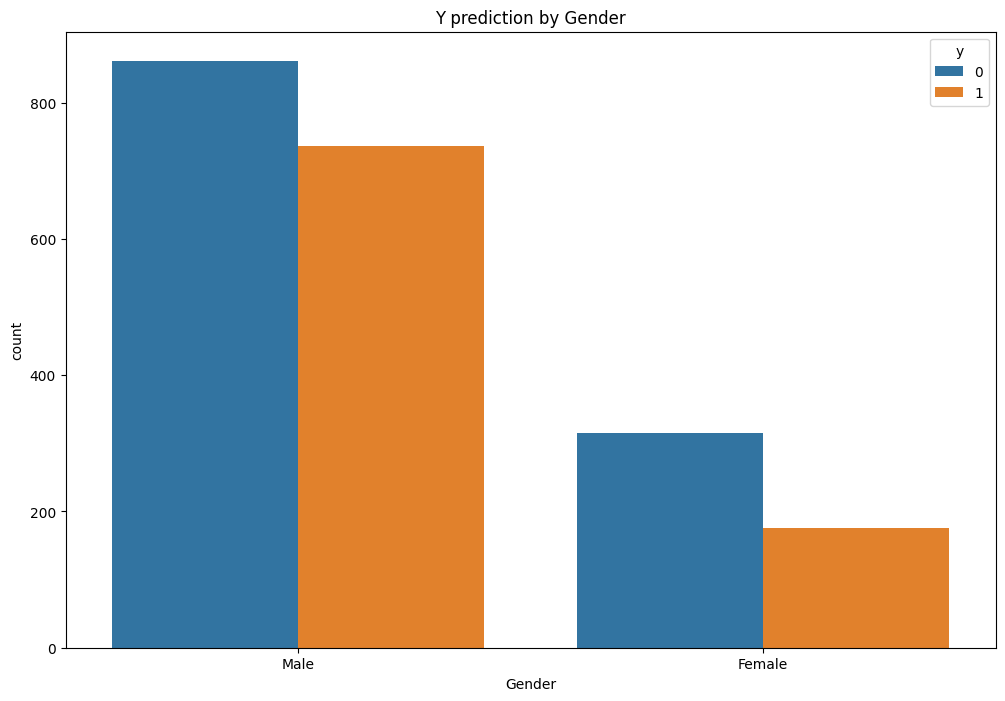

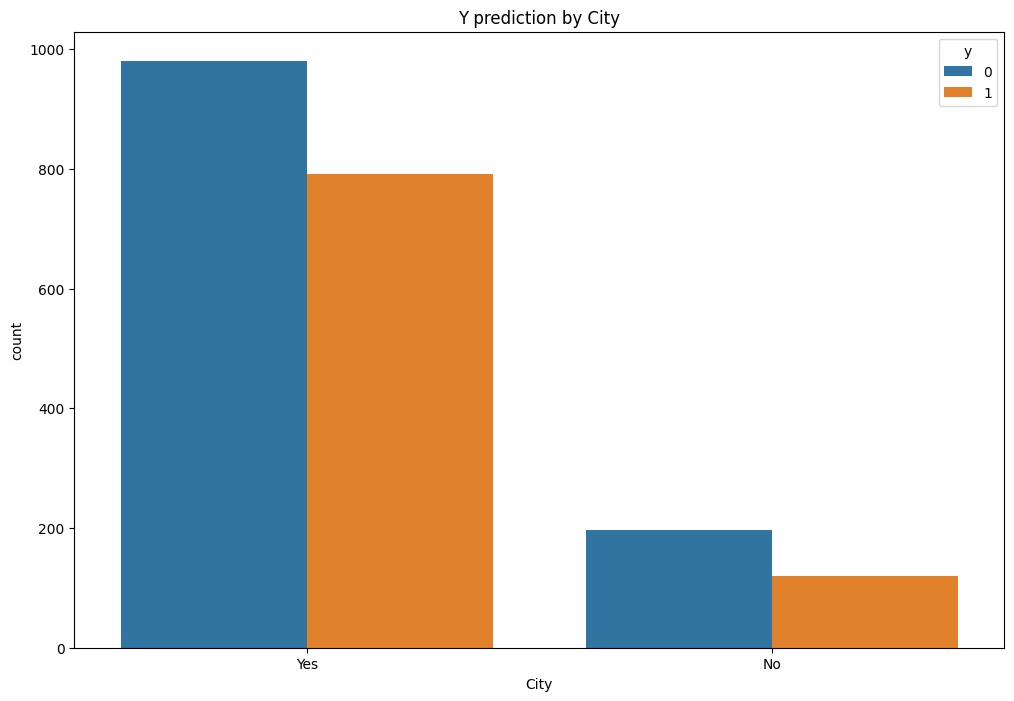

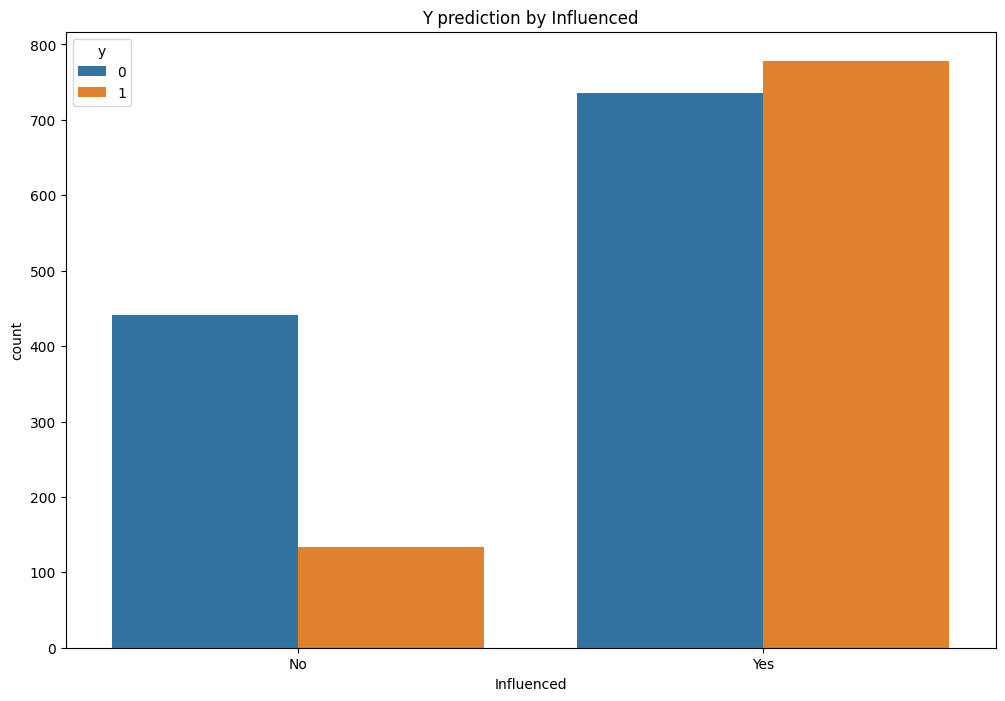

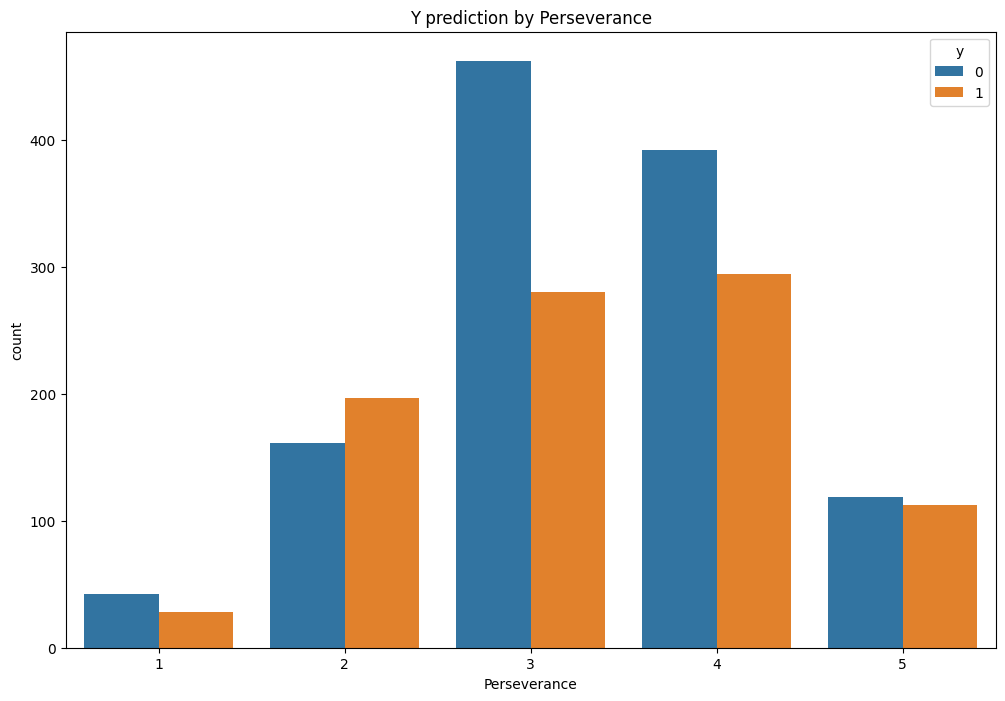

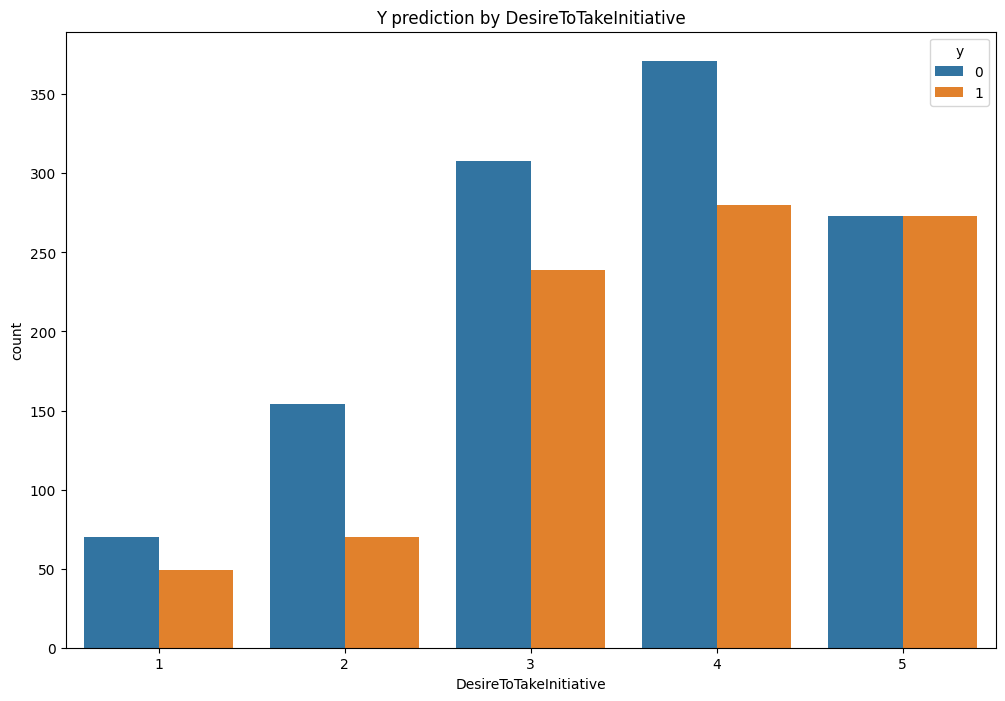

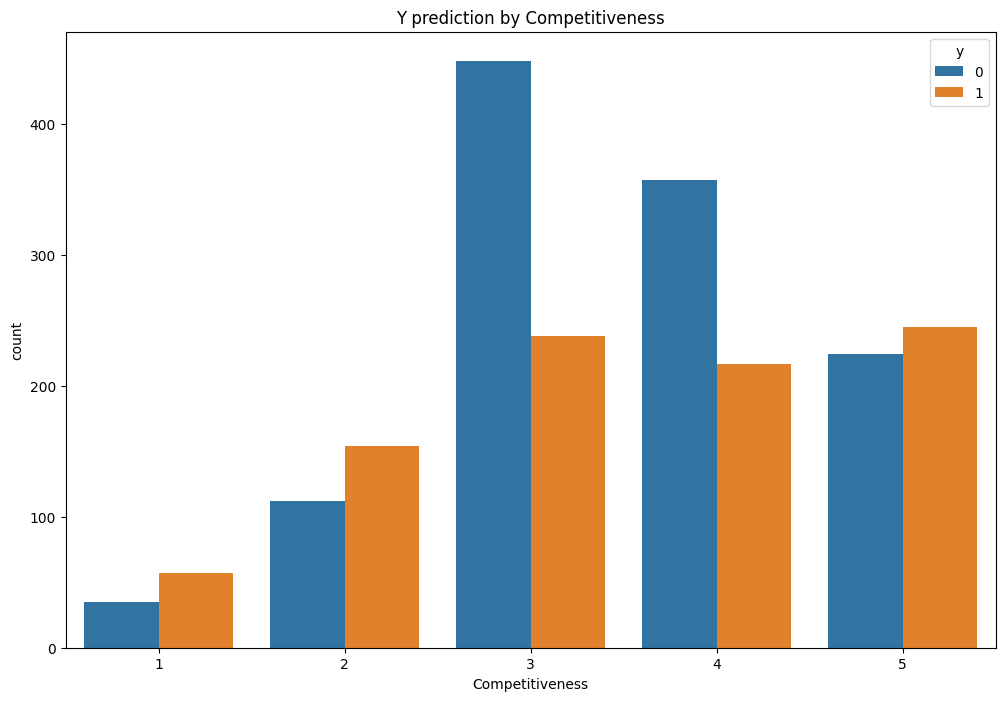

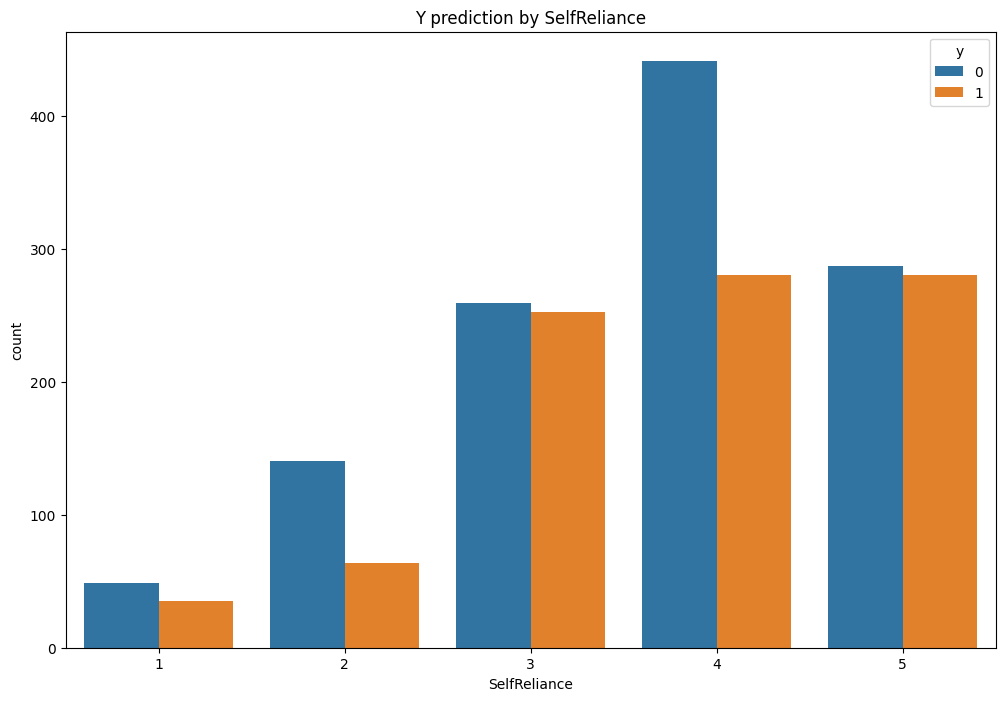

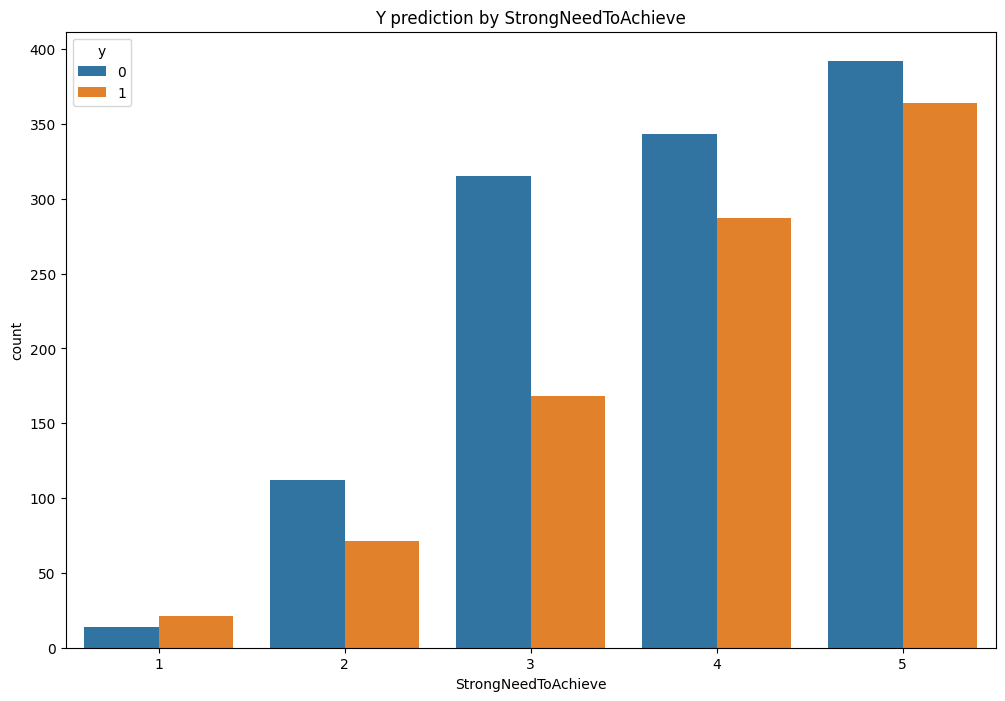

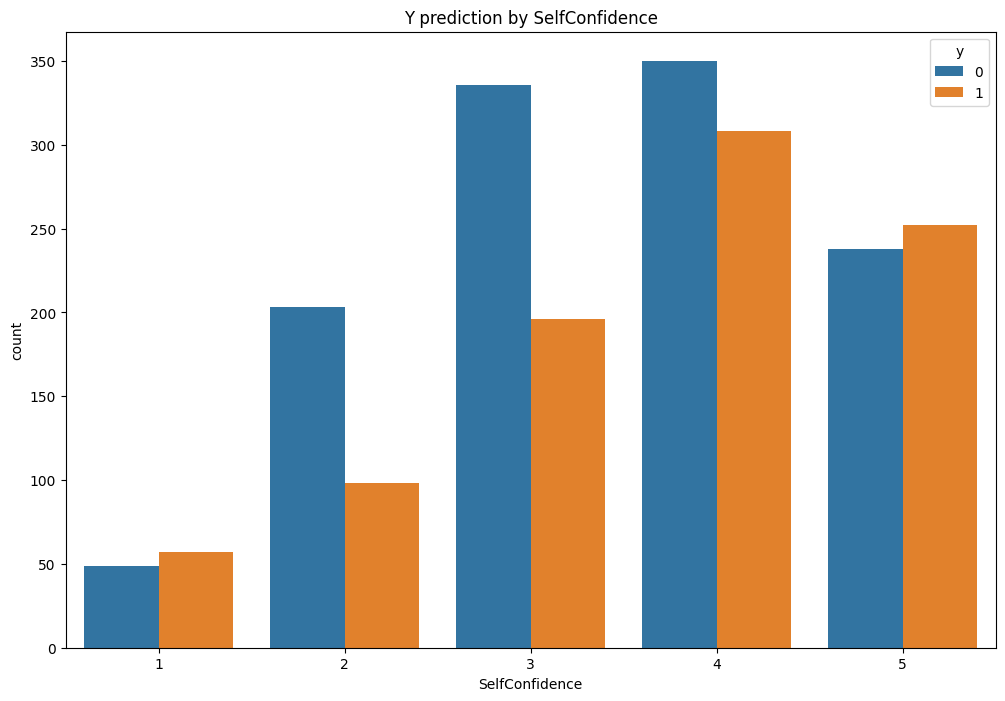

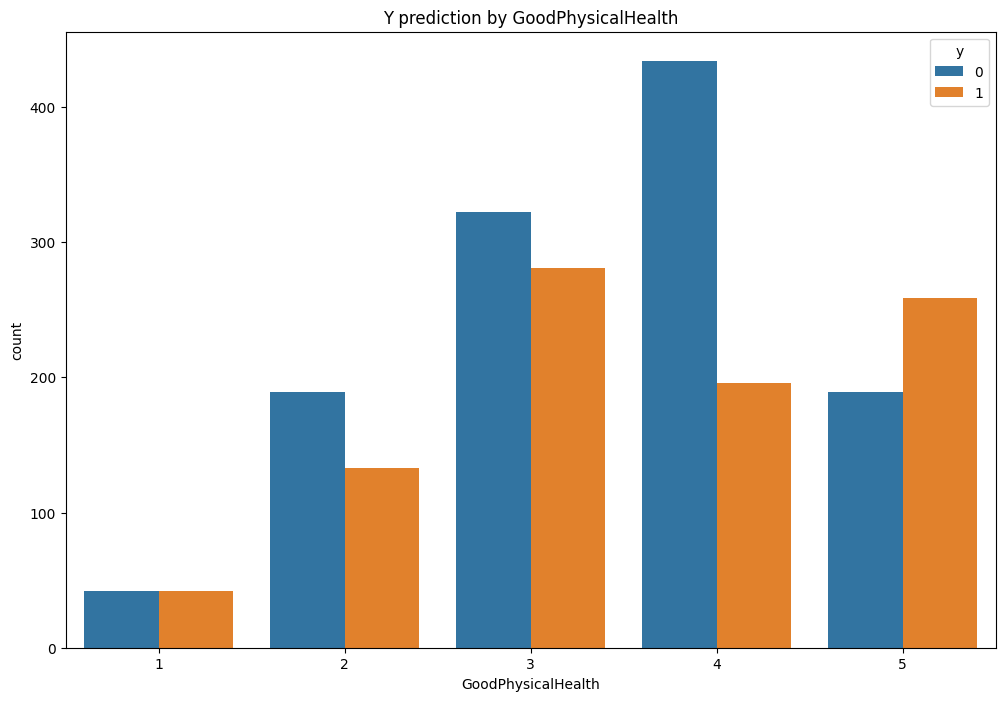

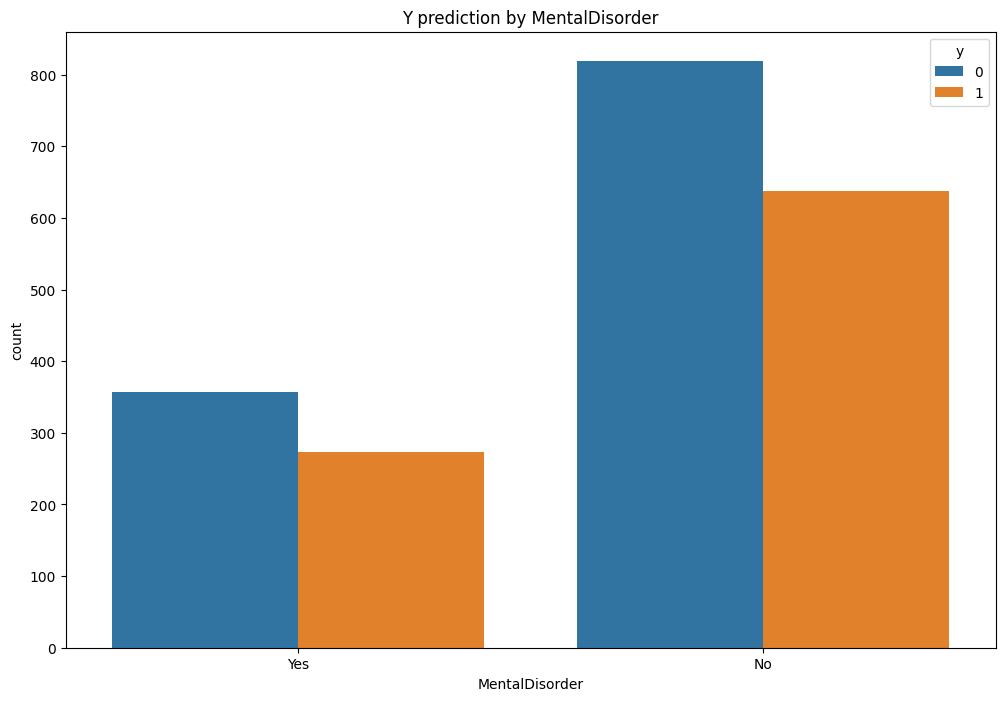

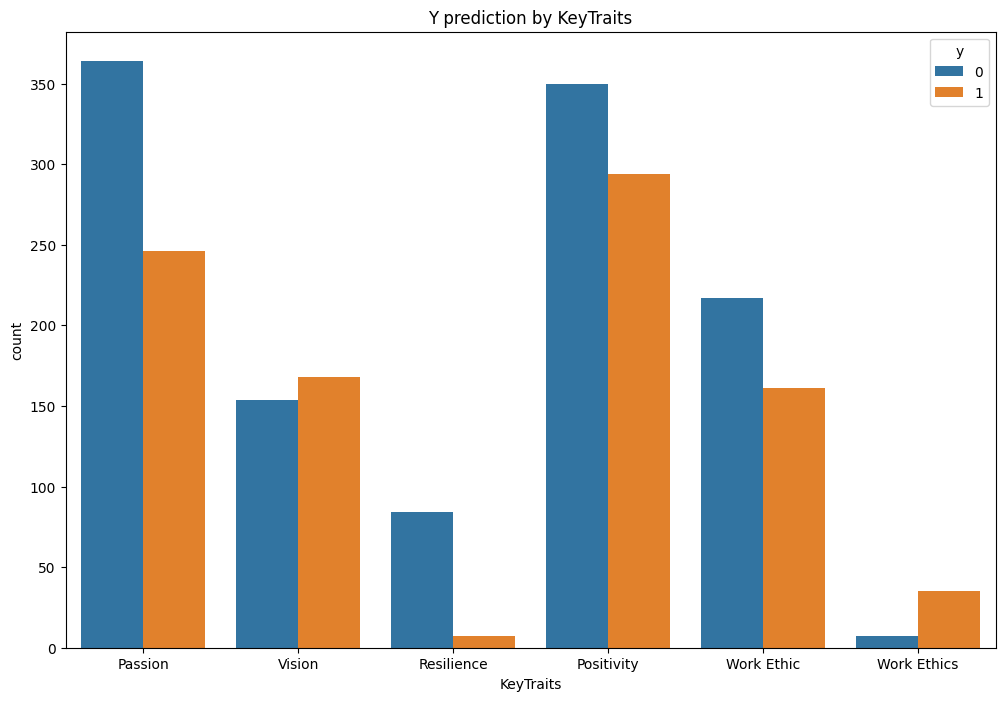

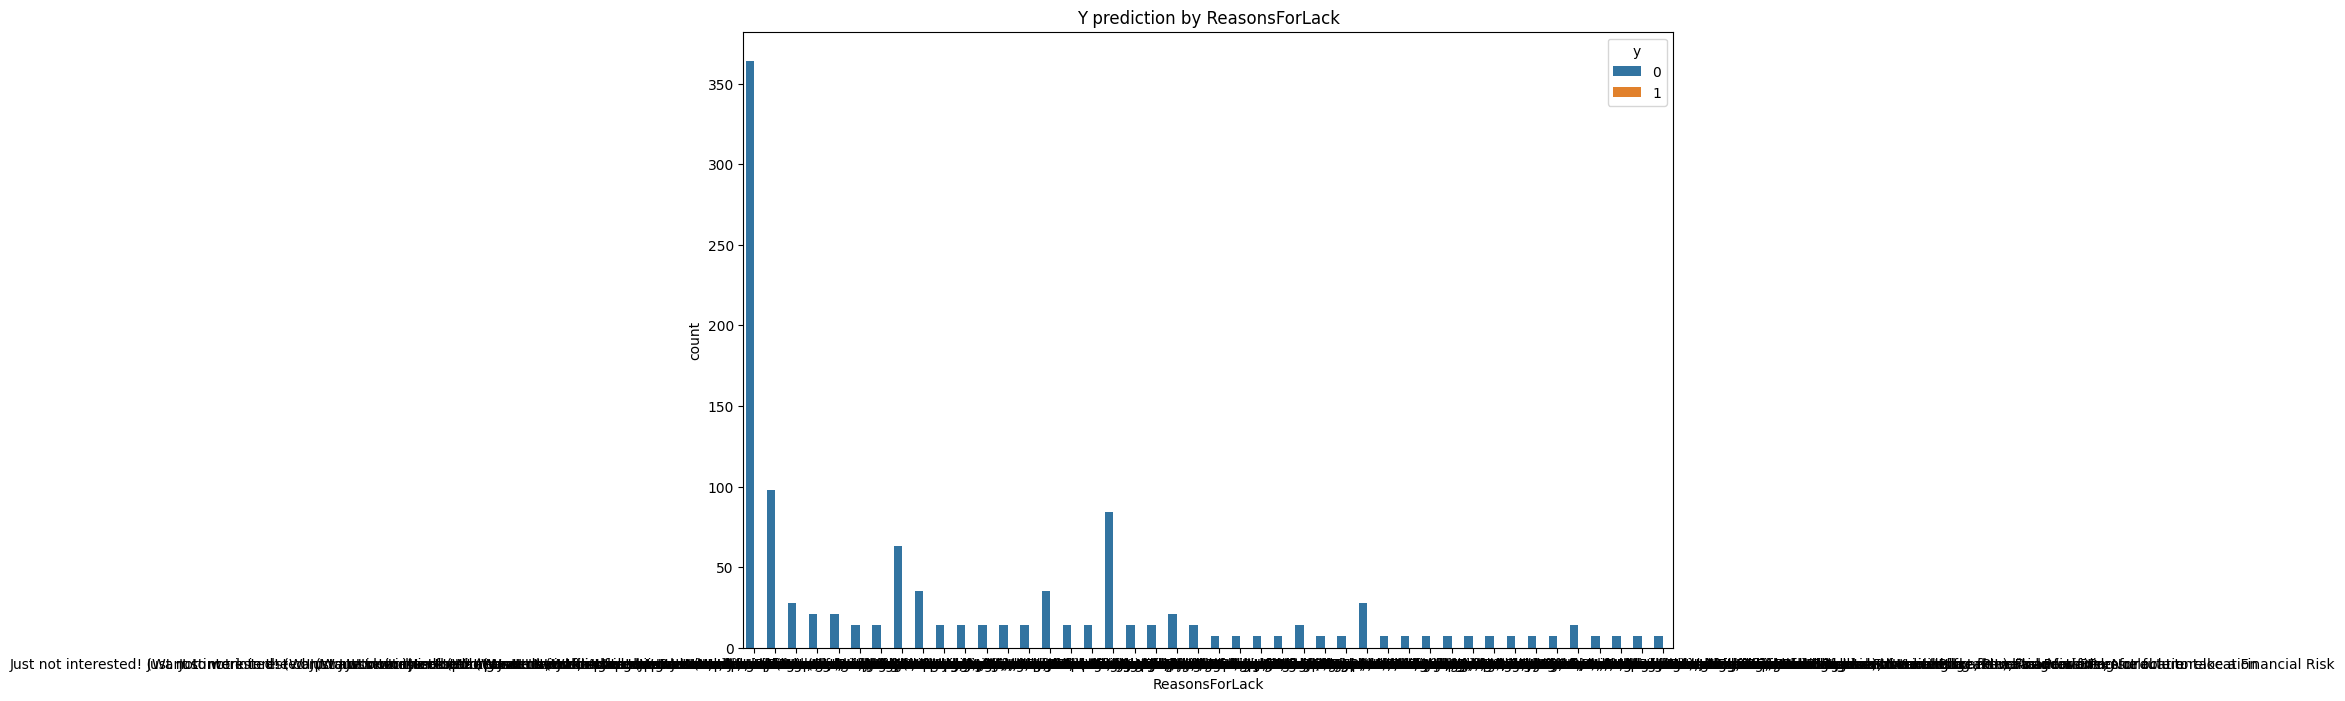

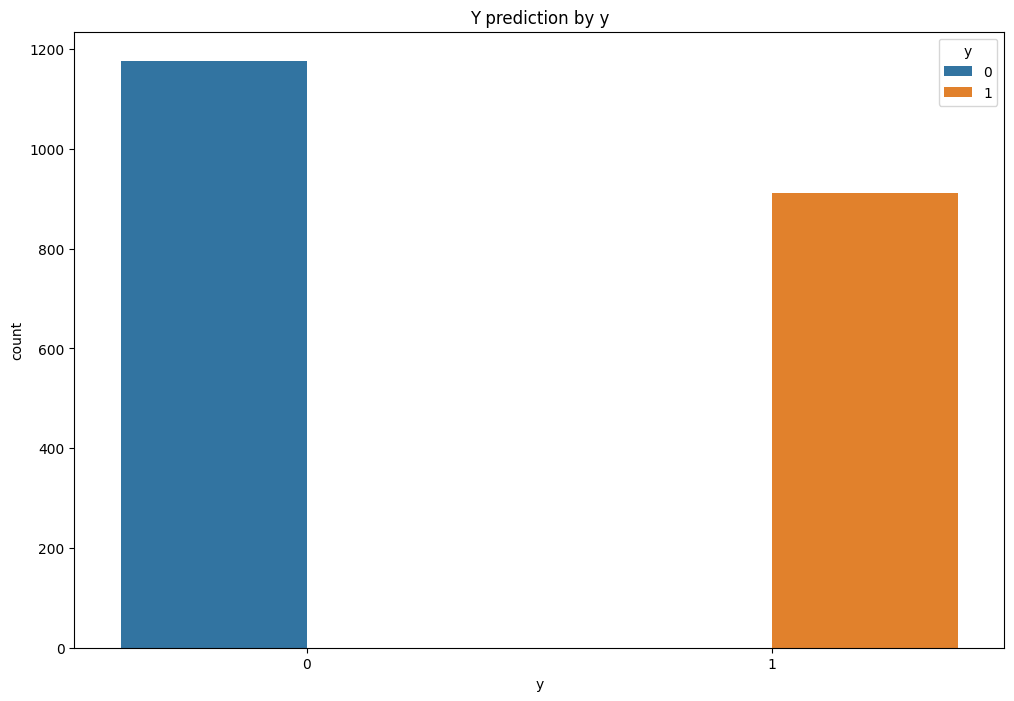

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# List features
features_to_analyze = ['EducationSector', 'IndividualProject', 'Age', 'Gender', 'City', 'Influenced', 'Perseverance',
'DesireToTakeInitiative', 'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
'SelfConfidence', 'GoodPhysicalHealth', 'MentalDisorder', 'KeyTraits', 'ReasonsForLack', 'y']

for feature in features_to_analyze:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=feature, hue='y', data=data)
    plt.title(f'Y prediction by {feature}')
    plt.show()


# Student profile


Demographic Information:
The age distribution of students in the dataset ranges from 17 to 26, with a notable concentration of more competent students falling within the age range of 18 to 22. Gender plays a role in entrepreneurial competence, with male students tending to exhibit higher levels of competence. Moreover, the choice of education sector is influential, as students in Engineering, Social Sciences, and Business courses demonstrate higher entrepreneurial competence. City-based students also outperform their non-city counterparts in terms of entrepreneurial skills.

Academic Traits:
Participation in individual projects, although not quantified, likely contributes to entrepreneurial competence. Notably, students with higher competitiveness levels (3-5), a strong need to achieve (motivation levels 2-5), and self-confidence (confidence levels 3-5) show elevated entrepreneurial competence. Perseverance is another trait associated with competence, as students with perseverance levels of 3-5 tend to perform better.

Health and Well-being:
Physical health is linked to entrepreneurial competence, with students reporting higher levels of physical health (3-5) demonstrating greater competence. Furthermore, mental health plays a role, as students without mental disorders tend to exhibit higher levels of entrepreneurial competence.

Personality Traits:
Initiative and self-reliance are essential personality traits contributing to entrepreneurial competence. Students with self-reliance levels of 3-5 demonstrate higher levels of competence.

Influence and Decision-Making:
External factors significantly influence entrepreneurial competence, as students influenced by external factors tend to have higher competence. Interestingly, reasons for lack do not seem to have a strong correlation with competence.

Additional Insights:
The age range of 18 to 22 emerges as a critical period for entrepreneurial competence, suggesting that interventions or programs targeting this age group could be particularly impactful. The observations highlight the importance of considering not only academic and professional factors but also health and personality traits when assessing entrepreneurial competence in students.

In [129]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

Performing Feature selection to pick our best features to build our model

In [130]:
Y = data['y']
X = data.drop('y', axis=1)
# Assuming 'y' is your target variable and 'X' is the features

# Factorize the categorical features
X_factorized = X.apply(lambda x: pd.factorize(x)[0])

# Scale the factorized features to a specific range (e.g., [0, 1])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_factorized)


selector = SelectKBest(score_func=chi2, k=13)


selector.fit(X_scaled, Y)

# Get the mask of selected features
selected_feature_mask = selector.get_support()

# Get the names of the selected features
selected_features = X_factorized.columns[selected_feature_mask]

selected_features


Index(['EducationSector', 'IndividualProject', 'Age', 'Gender', 'City',
       'Influenced', 'DesireToTakeInitiative', 'Competitiveness',
       'StrongNeedToAchieve', 'SelfConfidence', 'GoodPhysicalHealth',
       'KeyTraits', 'ReasonsForLack'],
      dtype='object')

Dropping features that are not relevant for predicting entrepreneurial competence of university students because they either bring about bias in the model if trained like gender. It can happend that more males or females data was collected as a result of this, the system can become bias towards females or males. Also, Competence in university students, we do not need their age to say if they are competent or not, same goes for the other features we are dropping.

In [131]:
columns = ['EducationSector','Age', 'Gender', 'City', 'ReasonsForLack']

for column in columns:
  data = data.drop(column, axis=1)

data

,IndividualProject,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,No,No,2,2,3,3,2,2,3,Yes,Passion,1
1,Yes,Yes,3,3,3,4,4,3,4,Yes,Vision,0
2,No,No,3,4,3,3,3,4,4,No,Passion,0
3,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,0
4,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2082,Yes,Yes,3,4,3,3,4,3,4,Yes,Work Ethic,0
2083,Yes,No,4,5,4,4,5,5,3,Yes,Positivity,1
2084,No,Yes,3,5,4,5,5,5,3,No,Positivity,0
2085,No,Yes,5,5,5,5,5,5,5,No,Positivity,0


Performing encoding on our data

In [132]:
numeric_data= data.select_dtypes(include=['int64','float64'])
categorical_data=data.select_dtypes(exclude=['int64','float64'])

numeric_data.info()
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Perseverance            2087 non-null   int64
 1   DesireToTakeInitiative  2087 non-null   int64
 2   Competitiveness         2087 non-null   int64
 3   SelfReliance            2087 non-null   int64
 4   StrongNeedToAchieve     2087 non-null   int64
 5   SelfConfidence          2087 non-null   int64
 6   GoodPhysicalHealth      2087 non-null   int64
 7   y                       2087 non-null   int64
dtypes: int64(8)
memory usage: 130.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   IndividualProject  2087 non-null   object
 1   Influenced         2087 non-null   object
 2   MentalDisorder     2087 non-null   object
 3 

In [133]:
numeric_data1 = numeric_data.fillna(method='ffill')

numeric_data1.info()

categorical_data1 = categorical_data.fillna(method='ffill')

categorical_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Perseverance            2087 non-null   int64
 1   DesireToTakeInitiative  2087 non-null   int64
 2   Competitiveness         2087 non-null   int64
 3   SelfReliance            2087 non-null   int64
 4   StrongNeedToAchieve     2087 non-null   int64
 5   SelfConfidence          2087 non-null   int64
 6   GoodPhysicalHealth      2087 non-null   int64
 7   y                       2087 non-null   int64
dtypes: int64(8)
memory usage: 130.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   IndividualProject  2087 non-null   object
 1   Influenced         2087 non-null   object
 2   MentalDisorder     2087 non-null   object
 3 

In [134]:
columns = list(categorical_data1.columns.values)



for column in columns:
  categorical_data1[column],_ = pd.factorize(categorical_data1[column])


categorical_data1

,IndividualProject,Influenced,MentalDisorder,KeyTraits
0,0,0,0,0
1,1,1,0,1
2,0,0,1,0
3,1,1,1,2
4,1,1,0,1
...,...,...,...,...
2082,1,1,0,4
2083,1,0,0,3
2084,0,1,1,3
2085,0,1,1,3


In [135]:
numerical_data = numeric_data.drop('y', axis=1)
Y = data['y']


#numerical_data = pd.DataFrame(X, columns =numerical_data.columns)

numerical_data

,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth
0,2,2,3,3,2,2,3
1,3,3,3,4,4,3,4
2,3,4,3,3,3,4,4
3,3,3,3,3,4,3,3
4,2,3,3,3,4,3,2
...,...,...,...,...,...,...,...
2082,3,4,3,3,4,3,4
2083,4,5,4,4,5,5,3
2084,3,5,4,5,5,5,3
2085,5,5,5,5,5,5,5


In [136]:
X = pd.concat([numerical_data, categorical_data1], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Perseverance            2087 non-null   int64
 1   DesireToTakeInitiative  2087 non-null   int64
 2   Competitiveness         2087 non-null   int64
 3   SelfReliance            2087 non-null   int64
 4   StrongNeedToAchieve     2087 non-null   int64
 5   SelfConfidence          2087 non-null   int64
 6   GoodPhysicalHealth      2087 non-null   int64
 7   IndividualProject       2087 non-null   int64
 8   Influenced              2087 non-null   int64
 9   MentalDisorder          2087 non-null   int64
 10  KeyTraits               2087 non-null   int64
dtypes: int64(11)
memory usage: 179.5 KB


Sectioning our data into 3 to avoid overfitting and for hyper parameter tuning

In [137]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Splitting the data into training (80%), validation (10%), and testing (10%)
X_train, X_temp, Y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Traning the model

In [138]:
import tensorflow
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, roc_auc_score


In [139]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(128, activation='relu')(input_layer)
hidden_layer_2 = Dense(64, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [140]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/100
53/53 [==============================] - 2s 11ms/step - loss: 0.6837 - accuracy: 0.5878 - val_loss: 0.6689 - val_accuracy: 0.5837
Epoch 2/100
53/53 [==============================] - 0s 6ms/step - loss: 0.6688 - accuracy: 0.6213 - val_loss: 0.6585 - val_accuracy: 0.5981
Epoch 3/100
53/53 [==============================] - 0s 6ms/step - loss: 0.6609 - accuracy: 0.6153 - val_loss: 0.6558 - val_accuracy: 0.6364
Epoch 4/100
53/53 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6645 - val_loss: 0.6449 - val_accuracy: 0.6077
Epoch 5/100
53/53 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.6351 - val_loss: 0.6417 - val_accuracy: 0.6555
Epoch 6/100
53/53 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.6417 - val_loss: 0.6483 - val_accuracy: 0.6603
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6585 - val_loss: 0.6341 - val_accuracy: 0.6890
Epoch 8/100


In [141]:
_, accuracy = model.evaluate(X_train, Y_train)
accuracy*100

53/53 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.8820


88.19652199745178

In [142]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

7/7 [==============================] - 0s 3ms/step - loss: 0.3553 - accuracy: 0.8230
Test Loss: 0.3553
Test Accuracy: 82.2967


In [143]:
y_pred = model.predict(X_test)

output = (y_pred >0.5).astype(int)

7/7 [==============================] - 0s 2ms/step


In [144]:
threshold = 0.5  # Choose an appropriate threshold
y_pred_binary = [1 if val >= threshold else 0 for val in y_pred]


In [145]:
accuracy = accuracy_score(Y_test, y_pred_binary)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 82.30%


Traning a second model using leakyRelu as activation function
Also, we are adding batch narmalisation to improve training process and normalisation.
Lastly, we added kernel regulisers to prevent overfitting and improve the generalization ability of our model.

In [146]:
from keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    if epoch < 50:
        return 0.0001
    elif epoch < 75:
        return 0.00001
    else:
        return 0.000001

lr_scheduler = LearningRateScheduler(lr_schedule)

In [147]:
from keras.layers import BatchNormalization

# Add Batch Normalization after each Dense layer
hidden_layer_1 = BatchNormalization()(Dense(32, activation='relu')(input_layer))
hidden_layer_2 = BatchNormalization()(Dense(24, activation='relu')(hidden_layer_1))
hidden_layer_3 = BatchNormalization()(Dense(12, activation='relu')(hidden_layer_2))

In [148]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [149]:
from keras.regularizers import l2

# Adding kernel regularizer to each Dense layer
hidden_layer_1 = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
hidden_layer_2 = Dense(24, activation='relu', kernel_regularizer=l2(0.001))(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu', kernel_regularizer=l2(0.001))(hidden_layer_2)

In [150]:
from keras.layers import LeakyReLU

# Changing activation function to LeakyReLU
hidden_layer_1 = Dense(32, activation=LeakyReLU(alpha=0.01))(input_layer)
hidden_layer_2 = Dense(24, activation=LeakyReLU(alpha=0.01))(hidden_layer_1)
hidden_layer_3 = Dense(12, activation=LeakyReLU(alpha=0.01))(hidden_layer_2)

In [151]:
hidden_layer_4 = Dense(8, activation='relu')(hidden_layer_3)

In [152]:
#from keras.callbacks import ModelCheckpoint

#model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [153]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred_binary)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Calculate AUC score
auc_score = roc_auc_score(Y_test, y_pred_prob)
print(f'AUC Score: {auc_score * 100:.2f}%')

7/7 [==============================] - 0s 4ms/step
Test Accuracy: 82.30%
AUC Score: 92.76%


# Optimization with GridSearch

In [154]:
!pip install scikeras

In [155]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer, roc_auc_score
from scikeras.wrappers import KerasClassifier

In [156]:
def create_model(optimizer='adam', hidden_layer1_units=64, hidden_layer2_units=32):
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(hidden_layer1_units, activation='relu')(input_layer)
    hidden_layer2 = Dense(hidden_layer2_units, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier for use with GridSearchCV
model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0, hidden_layer1_units=32, hidden_layer2_units=16)
model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the retrained model on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(Y_test, y_pred_binary)
auc_score = roc_auc_score(Y_test, y_pred)

print(f'Test Accuracy (Model): {accuracy}')
print(f'AUC Score (Model): {auc_score}')

Test Accuracy (Model): 0.6794258373205742
AUC Score (Model): 0.6607841311231141


In [157]:
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'hidden_layer1_units': [32, 64, 128],
    'hidden_layer2_units': [16, 32, 64]
}

# Define custom scorer for GridSearchCV based on AUC score
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=auc_scorer, cv=StratifiedKFold(n_splits=5), verbose=1)
grid_result = grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [158]:
print(f'Best Parameters: {grid_result.best_params_}')
print(f'Best AUC Score: {grid_result.best_score_}')

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy_best = accuracy_score(Y_test, y_pred_binary)
auc_score_best = roc_auc_score(Y_test, y_pred)
print(f'Test Accuracy (Best Model): {accuracy_best*100:.4}%')
print(f'AUC Score (Best Model): {auc_score_best*100:.4}%')

Best Parameters: {'hidden_layer1_units': 128, 'hidden_layer2_units': 64, 'optimizer': 'sgd'}
Best AUC Score: 0.7388059606344326
Test Accuracy (Best Model): 76.56%
AUC Score (Best Model): 77.98%


In [175]:
def create_model(optimizer='adam', hidden_layer1_units=64, hidden_layer2_units=32):
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(hidden_layer1_units, activation='relu')(input_layer)
    hidden_layer2 = Dense(hidden_layer2_units, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier for use with GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Best parameters obtained from the optimization process
best_params = {'hidden_layer1_units': 128, 'hidden_layer2_units': 64, 'optimizer': 'adam'}

# Set the best parameters to the model
best_model = create_model(**best_params)

# Retrain the model on the entire training set
best_model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the retrained model on the test set
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy_retrained = accuracy_score(Y_test, y_pred_binary)
auc_score_retrained = roc_auc_score(Y_test, y_pred)

print(f'Test Accuracy (Retrained Model): {accuracy_retrained*100:.4}%')
print(f'AUC Score (Retrained Model): {auc_score_retrained*100:.4}%')

7/7 [==============================] - 0s 3ms/step
Test Accuracy (Retrained Model): 71.29%
AUC Score (Retrained Model): 80.91%


# Saving model using pickles

In [179]:
import pickle
best_model = best_model
# Save the trained model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


After Optimizing both with grid search and keras tuner, we were able to obtain a better test accuracy with grid search. This implies we will save the model from grid search.

# Optimisation with Keras Tuner
We added dropouts to prevent overfitting and improve the generalization performance of the model.


In [160]:
pip install keras_tuner

In [161]:
import keras_tuner
from tensorflow import keras

In [162]:
def build_model(hp):
    input_layer = keras.layers.Input(shape=(X_train.shape[1],))
    x = input_layer

    # Tune the number of hidden layers and units
    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=4)):
        units = hp.Int(f'units_{i}', min_value=32, max_value=96, step=32)
        activation = hp.Choice(f'activation_{i}', values=['relu', 'tanh'])
        x = keras.layers.Dense(units=units, activation=activation)(x)
        # Add dropout layer after each dense layer
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        x = keras.layers.Dropout(dropout_rate)(x)

    output_layer = keras.layers.Dense(1, activation='sigmoid')(x)

    # Tune the learning rate
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    model = keras.Model(inputs=input_layer, outputs=output_layer)

    model.compile(
        optimizer=keras.optimizers.legacy.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [163]:
build_model(keras_tuner.HyperParameters())

In [164]:
tuner = keras_tuner.Hyperband(
  hypermodel=build_model,
  objective='val_accuracy',
  max_epochs=100,
  factor=3,
  directory='tuning_dir',
  project_name='samples')

Reloading Tuner from tuning_dir/samples/tuner0.json


In [165]:
tuner.search(X_train, Y_train, epochs=30 ,validation_data=(X_test, Y_test))

In [166]:
tuner.search_space_summary()

Search space summary
Default search space size: 14
num_hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 96, 'step': 32, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout_0 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 96, 'step': 32, 'sampling': 'linear'}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units_

In [167]:
tuner.results_summary()

Results summary
Results in tuning_dir/samples
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0142 summary
Hyperparameters:
num_hidden_layers: 1
units_0: 64
activation_0: relu
dropout_0: 0.4
lr: 0.00026152978239516096
units_1: 96
activation_1: tanh
dropout_1: 0.0
units_2: 32
activation_2: tanh
dropout_2: 0.30000000000000004
units_3: 64
activation_3: relu
dropout_3: 0.2
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 4
tuner/round: 3
tuner/trial_id: 0131
Score: 0.8181818127632141

Trial 0131 summary
Hyperparameters:
num_hidden_layers: 1
units_0: 64
activation_0: relu
dropout_0: 0.4
lr: 0.00026152978239516096
units_1: 96
activation_1: tanh
dropout_1: 0.0
units_2: 32
activation_2: tanh
dropout_2: 0.30000000000000004
units_3: 64
activation_3: relu
dropout_3: 0.2
tuner/epochs: 12
tuner/initial_epoch: 4
tuner/bracket: 4
tuner/round: 2
tuner/trial_id: 0098
Score: 0.8181818127632141

Trial 0146 summary
Hyperparameters:
num_hidden_layers: 1
units_0: 64
acti

In [168]:
best_model = tuner.get_best_models(num_models=2)[0]

best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [169]:
test_accuracy = best_model.evaluate(X_test, Y_test)[1]
print(f"Test Accuracy: {test_accuracy*100:.4f}%")

7/7 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5694
Test Accuracy: 56.9378%
